# ***Importing Dataset***

In [1]:
!gdown --id 1QvXnm6_QKuL64KMLwmbtMSzezzKfbZft

Downloading...
From: https://drive.google.com/uc?id=1QvXnm6_QKuL64KMLwmbtMSzezzKfbZft
To: /content/archive.zip
363MB [00:06, 57.6MB/s]


In [2]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# *Visualizing Some Images From The Dataset*

In [6]:
import pandas as pd
from keras.optimizers import *
from keras.models import *
from keras.layers import *
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Model
import shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

plt.style.use('seaborn')

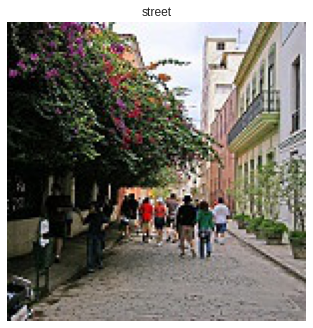

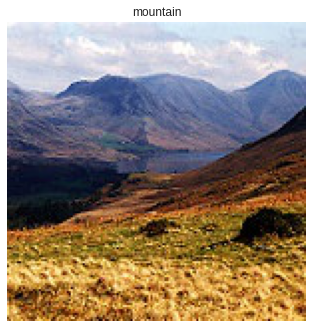

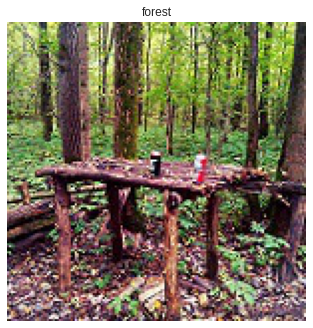

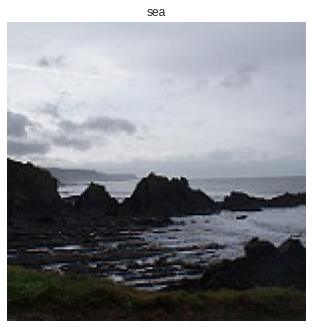

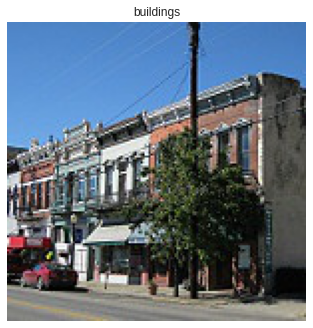

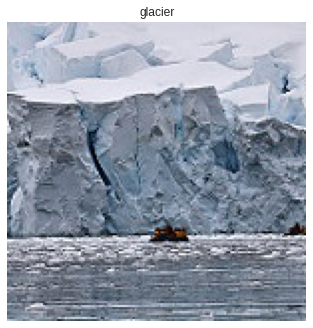

In [7]:
#Viewing 1 image from each class
classes=os.listdir('/content/seg_train/seg_train')
for i in range(len(classes)):
  images_of_a_class=os.listdir('/content/seg_train/seg_train/'+classes[i])
  for j in range(len(images_of_a_class)):
    image=plt.imread('/content/seg_train/seg_train/'+classes[i]+'/'+images_of_a_class[j])
    image=image/255.0
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis('off')
    plt.show()
    break

## ***Custom CNN***

In [8]:
train_gen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(rescale=1/255.0)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [9]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(6, activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [10]:
history=model_1.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 179s 617ms/step - loss: 1.4116 - accuracy: 0.4154 - val_loss: 0.9151 - val_accuracy: 0.6473
Epoch 2/20
220/220 [==============================] - 135s 611ms/step - loss: 0.8930 - accuracy: 0.6550 - val_loss: 0.7251 - val_accuracy: 0.7360
Epoch 3/20
220/220 [==============================] - 134s 609ms/step - loss: 0.7498 - accuracy: 0.7263 - val_loss: 0.6070 - val_accuracy: 0.7780
Epoch 4/20
220/220 [==============================] - 134s 611ms/step - loss: 0.6555 - accuracy: 0.7579 - val_loss: 0.4986 - val_accuracy: 0.8233
Epoch 5/20
220/220 [==============================] - 134s 610ms/step - loss: 0.6002 - accuracy: 0.7842 - val_loss: 0.4827 - val_accuracy: 0.8260
Epoch 6/20
220/220 [==============================] - 134s 608ms/step - loss: 0.5641 - accuracy: 0.7914 - val_loss: 0.4612 - val_accuracy: 0.8360
Epoch 7/20
220/220 [==============================] - 134s 607ms/step - loss: 0.5300 - accuracy: 0.8114 - val_loss: 0.4347 -

In [11]:
model_1.save('custom.h5')

# ***InceptionV3***

In [12]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input
model=InceptionV3(weights='imagenet',input_shape=(224,224,3),include_top=False)

av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(2048,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(1024,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(512,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
inception=Model(inputs=model.input,outputs=fc4)
inception.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________________________

In [13]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [14]:
for i in range(len(inception.layers)):
    print(i)
    print(inception.layers[i])
    if(i<203):
        inception.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
inception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
inception_v3=inception.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 82s 279ms/step - loss: 0.7059 - accuracy: 0.7508 - val_loss: 0.3614 - val_accuracy: 0.8927
Epoch 2/20
220/220 [==============================] - 52s 237ms/step - loss: 0.2293 - accuracy: 0.9271 - val_loss: 0.2844 - val_accuracy: 0.9067
Epoch 3/20
220/220 [==============================] - 52s 236ms/step - loss: 0.1796 - accuracy: 0.9428 - val_loss: 0.2758 - val_accuracy: 0.9187
Epoch 4/20
220/220 [==============================] - 52s 236ms/step - loss: 0.1281 - accuracy: 0.9599 - val_loss: 0.3380 - val_accuracy: 0.9180
Epoch 5/20
220/220 [==============================] - 52s 236ms/step - loss: 0.0948 - accuracy: 0.9689 - val_loss: 0.4054 - val_accuracy: 0.9047
Epoch 6/20
220/220 [==============================] - 52s 236ms/step - loss: 0.0742 - accuracy: 0.9765 - val_loss: 0.2989 - val_accuracy: 0.9233
Epoch 7/20
220/220 [==============================] - 52s 236ms/step - loss: 0.0787 - accuracy: 0.9763 - val_loss: 0.3431 - val_ac

In [16]:
inception.save('inception.h5')

# ***VGG16***

In [22]:
from keras.applications.vgg16 import VGG16,preprocess_input
model=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(512,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(256,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(128,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
vgg16=Model(inputs=model.input,outputs=fc4)
vgg16.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [25]:
for i in range(len(vgg16.layers)):
    print(i)
    print(vgg16.layers[i])
    if(i<8):
        vgg16.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [26]:
vgg16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
VGG16=vgg16.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 109s 489ms/step - loss: 2.3138 - accuracy: 0.2154 - val_loss: 1.1840 - val_accuracy: 0.4283
Epoch 2/20
220/220 [==============================] - 107s 485ms/step - loss: 1.1493 - accuracy: 0.4676 - val_loss: 0.7373 - val_accuracy: 0.7340
Epoch 3/20
220/220 [==============================] - 107s 485ms/step - loss: 0.7356 - accuracy: 0.7063 - val_loss: 0.5609 - val_accuracy: 0.8297
Epoch 4/20
220/220 [==============================] - 107s 485ms/step - loss: 0.5401 - accuracy: 0.8120 - val_loss: 0.5793 - val_accuracy: 0.7863
Epoch 5/20
220/220 [==============================] - 107s 484ms/step - loss: 0.5128 - accuracy: 0.8218 - val_loss: 0.5004 - val_accuracy: 0.8353
Epoch 6/20
220/220 [==============================] - 106s 483ms/step - loss: 0.4593 - accuracy: 0.8409 - val_loss: 0.4705 - val_accuracy: 0.8403
Epoch 7/20
220/220 [==============================] - 106s 483ms/step - loss: 0.4188 - accuracy: 0.8583 - val_loss: 0.4614 -

In [28]:
vgg16.save('vgg16.h5')

## ***Xception***

In [29]:
from keras.applications.xception import Xception,preprocess_input
model=Xception(weights='imagenet',input_shape=(224,224,3),include_top=False)
model.summary()


83697664/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [30]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(2048,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(1024,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(512,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
xception=Model(inputs=model.input,outputs=fc4)
xception.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [31]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [32]:
for i in range(len(xception.layers)):
    print(i)
    print(xception.layers[i])
    if(i<103):
        xception.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139


In [33]:
xception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
Xception=xception.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 112s 463ms/step - loss: 0.5140 - accuracy: 0.8250 - val_loss: 0.2378 - val_accuracy: 0.9220
Epoch 2/20
220/220 [==============================] - 100s 456ms/step - loss: 0.2203 - accuracy: 0.9280 - val_loss: 0.2286 - val_accuracy: 0.9253
Epoch 3/20
220/220 [==============================] - 102s 464ms/step - loss: 0.1497 - accuracy: 0.9526 - val_loss: 0.3143 - val_accuracy: 0.9117
Epoch 4/20
220/220 [==============================] - 103s 466ms/step - loss: 0.1157 - accuracy: 0.9609 - val_loss: 0.7149 - val_accuracy: 0.8970
Epoch 5/20
220/220 [==============================] - 103s 466ms/step - loss: 0.1013 - accuracy: 0.9684 - val_loss: 0.5433 - val_accuracy: 0.8977
Epoch 6/20
220/220 [==============================] - 102s 465ms/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.3246 - val_accuracy: 0.9207
Epoch 7/20
220/220 [==============================] - 102s 466ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.4454 -

In [34]:
xception.save('xception.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## ***ResNet50***

In [35]:
from keras.applications.resnet import ResNet50,preprocess_input
model=ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)
model.summary()


94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [36]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(2048,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(1024,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(512,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
resnet50=Model(inputs=model.input,outputs=fc4)
resnet50.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [37]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [38]:

for i in range(len(resnet50.layers)):
    print(i)
    print(resnet50.layers[i])
    if(i<98):
        resnet50.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182


In [39]:
resnet50.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ResNet50=resnet50.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 102s 411ms/step - loss: 0.7446 - accuracy: 0.7929 - val_loss: 0.3344 - val_accuracy: 0.8993
Epoch 2/20
220/220 [==============================] - 85s 386ms/step - loss: 0.2210 - accuracy: 0.9271 - val_loss: 0.3089 - val_accuracy: 0.9030
Epoch 3/20
220/220 [==============================] - 85s 387ms/step - loss: 0.1734 - accuracy: 0.9444 - val_loss: 0.3313 - val_accuracy: 0.9010
Epoch 4/20
220/220 [==============================] - 85s 387ms/step - loss: 0.1250 - accuracy: 0.9592 - val_loss: 0.3198 - val_accuracy: 0.9117
Epoch 5/20
220/220 [==============================] - 85s 387ms/step - loss: 0.1003 - accuracy: 0.9664 - val_loss: 0.2528 - val_accuracy: 0.9307
Epoch 6/20
220/220 [==============================] - 85s 387ms/step - loss: 0.0613 - accuracy: 0.9783 - val_loss: 0.3497 - val_accuracy: 0.9187
Epoch 7/20
220/220 [==============================] - 85s 387ms/step - loss: 0.0484 - accuracy: 0.9861 - val_loss: 38.6351 - val_

In [40]:
resnet50.save('resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# **Visualization Of Accuracies And Losses**

In [42]:
import pandas as pd
   
Xception_history = pd.DataFrame(Xception.history) 
VGG16_history= pd.DataFrame(VGG16.history)
InceptionV3_history = pd.DataFrame(inception_v3.history) 
ResNet50_history= pd.DataFrame(ResNet50.history) 
Custom_history=pd.DataFrame(history.history)

Xception_history.to_csv('Xception.csv')
VGG16_history.to_csv('VGG16.csv')
InceptionV3_history.to_csv('InceptionV3.csv')
ResNet50_history.to_csv('ResNet50.csv')
Custom_history.to_csv('Custom.csv')

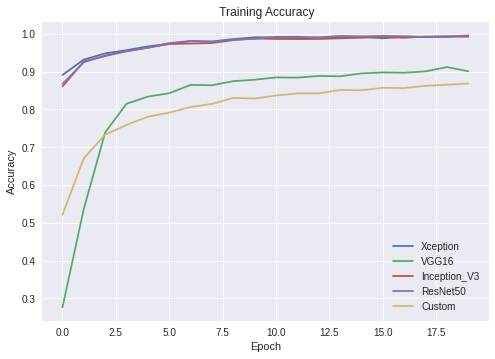

In [43]:
#Training Accuracy
plt.plot(Xception_history['accuracy'])
plt.plot(VGG16_history['accuracy'])
plt.plot(InceptionV3_history['accuracy'])
plt.plot(ResNet50_history['accuracy'])
plt.plot(Custom_history['accuracy'])
plt.title(' Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG16','Inception_V3','ResNet50','Custom'], loc='best')
plt.show()

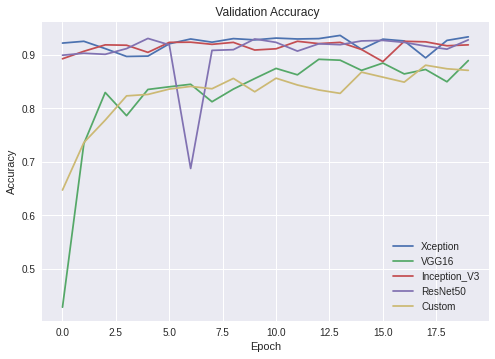

In [44]:
#Validation Accuracy
plt.plot(Xception_history['val_accuracy'])
plt.plot(VGG16_history['val_accuracy'])
plt.plot(InceptionV3_history['val_accuracy'])
plt.plot(ResNet50_history['val_accuracy'])
plt.plot(Custom_history['val_accuracy'])
plt.title(' Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG16','Inception_V3','ResNet50','Custom'], loc='best')
plt.show()

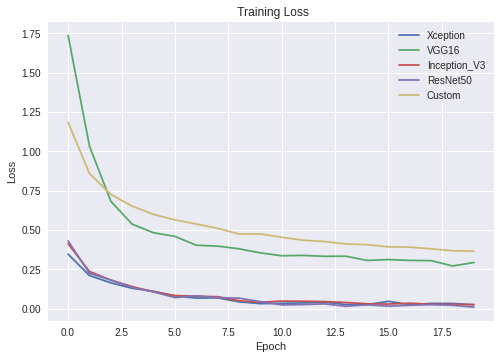

In [45]:
#Training Loss
plt.plot(Xception_history['loss'])
plt.plot(VGG16_history['loss'])
plt.plot(InceptionV3_history['loss'])
plt.plot(ResNet50_history['loss'])
plt.plot(Custom_history['loss'])
plt.title(' Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG16','Inception_V3','ResNet50','Custom'], loc='best')
plt.show()

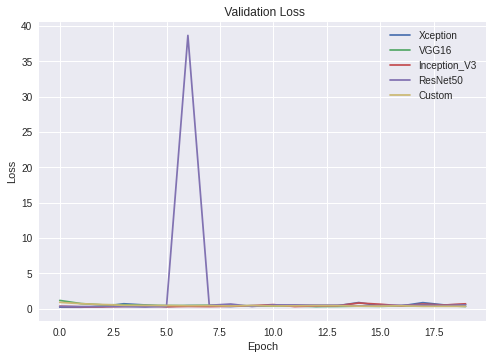

In [46]:
#Validation Loss
plt.plot(Xception_history['val_loss'])
plt.plot(VGG16_history['val_loss'])
plt.plot(InceptionV3_history['val_loss'])
plt.plot(ResNet50_history['val_loss'])
plt.plot(Custom_history['val_loss'])
plt.title(' Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG16','Inception_V3','ResNet50','Custom'], loc='best')
plt.show()